In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import matplotlib.image as mpimg
import cv2

import h5py

In [2]:
tf.__version__

'2.3.1'

In [3]:
model1=tf.keras.models.load_model('Autoencoder_colorizer.h5')
model2=tf.keras.models.load_model('Autoencoder_fusion_densenet_colorizer.h5')



In [21]:
def color(image_path):
  image=mpimg.imread(image_path)
  print(image.shape)
  image=cv2.resize(image,(224,224))
  #plt.imshow(image)
  bw_image=cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)
  #plt.imshow(bw_image)


  bw_image=bw_image/255.0
  bw_image1=np.copy(bw_image)
  bw_image=bw_image.reshape(1,224,224,1)

  p1=model1.predict(bw_image)
  p2=model2.predict(bw_image)
 


  fig=plt.figure(figsize=(20,15))
  n=3

  fig.add_subplot(1,n,1)
  plt.title('bw_image')
  plt.imshow(bw_image[0][:,:,0],cmap='gray')

  fig.add_subplot(1,n,2)
  plt.title('Autoencoder')
  plt.imshow(p1[0])

  fig.add_subplot(1,n,3)
  plt.title('Fusion_densenet_Autoencoder')
  plt.imshow(p2[0])

(251, 201, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


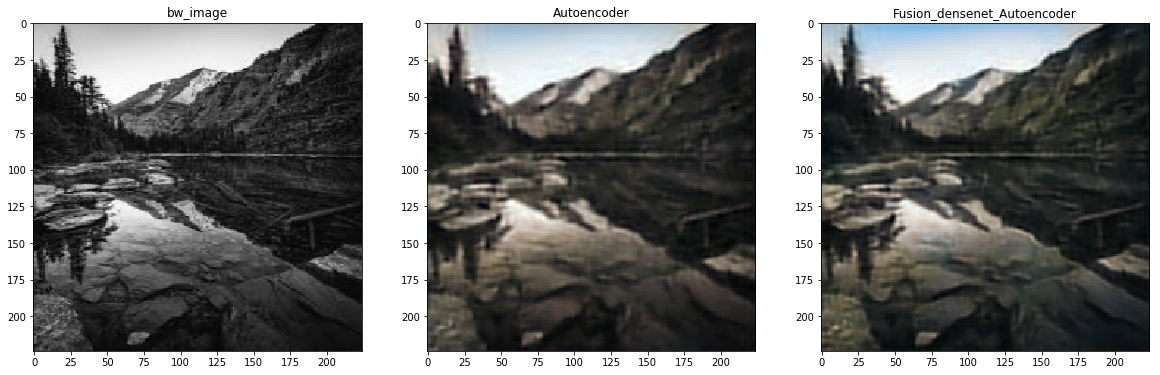

In [37]:
image_path='z6.jpg'
color(image_path)